In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy
import matplotlib.pyplot as plt
import random

In [7]:
train_dataset = datasets.MNIST('./', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST('./', train=False, transform=transforms.ToTensor(), download=True)

In [8]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [9]:
def plot_img(image):
    image = image.numpy()[0]
    image = 255 * image
    plt.imshow(image, cmap='gray')

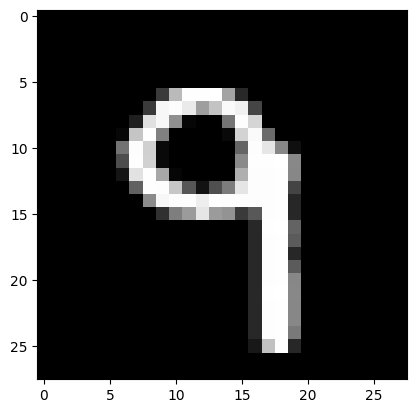

In [10]:
sample_data = next(iter(train_loader))
plot_img(sample_data[0][0])

In [11]:
# Input : 784 (28*28)
# Output : 10
linear = nn.Linear(784, 10, bias=True) # 선형 모델로 구성

criterion = nn.CrossEntropyLoss() # softmax 함수 적용됨.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [13]:
epochs = 50
for epoch in range(epochs):
    avg_loss = 0
    total_batch = len(train_loader)

    for x, y in train_loader:
        x = x.view(-1, 28*28)
        optimizer.zero_grad()
        model = linear(x)
        loss = criterion(model, y)
        loss.backward()
        optimizer.step()

        avg_loss += loss / total_batch
    print(f"Epochs : {epoch+1:04d}, Loss : {avg_loss:.9f}")
print("done")

Epochs : 0001, Loss : 0.320512503
Epochs : 0002, Loss : 0.299606204
Epochs : 0003, Loss : 0.289435297
Epochs : 0004, Loss : 0.282911122
Epochs : 0005, Loss : 0.278619498
Epochs : 0006, Loss : 0.274563760
Epochs : 0007, Loss : 0.271771461
Epochs : 0008, Loss : 0.269909948
Epochs : 0009, Loss : 0.267682344
Epochs : 0010, Loss : 0.265781969
Epochs : 0011, Loss : 0.264247447
Epochs : 0012, Loss : 0.262505949
Epochs : 0013, Loss : 0.261846542
Epochs : 0014, Loss : 0.259853810
Epochs : 0015, Loss : 0.259420872
Epochs : 0016, Loss : 0.257938832
Epochs : 0017, Loss : 0.257650912
Epochs : 0018, Loss : 0.256540895
Epochs : 0019, Loss : 0.255584657
Epochs : 0020, Loss : 0.254873633
Epochs : 0021, Loss : 0.253844768
Epochs : 0022, Loss : 0.253714204
Epochs : 0023, Loss : 0.252945215
Epochs : 0024, Loss : 0.252208799
Epochs : 0025, Loss : 0.251920164
Epochs : 0026, Loss : 0.250930488
Epochs : 0027, Loss : 0.250753462
Epochs : 0028, Loss : 0.250884354
Epochs : 0029, Loss : 0.249614552
Epochs : 0030,

Accuracy:  0.8682000041007996
Label:  7
Prediction:  7


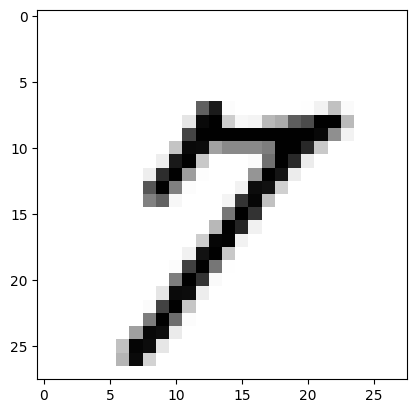

In [24]:
with torch.no_grad():
    x_test = test_dataset.data.view(-1, 28*28).float()
    y_test = test_dataset.targets

    pred = linear(x_test)
    correct = torch.argmax(pred, 1) == y_test
    accuracy = correct.float().mean()
    print('Accuracy: ', accuracy.item())

    r = random.randint(0, len(test_dataset) -1)
    x_single = test_dataset.data[r:r+1].view(-1, 28*28).float()
    y_single = test_dataset.targets[r:r+1]

    print('Label: ', y_single.item())
    single_pred = linear(x_single)
    print('Prediction: ', torch.argmax(single_pred, 1).item())

    plt.imshow(test_dataset.data[r:r+1].view(28, 28), cmap='Greys')
    plt.show()